<a href="https://colab.research.google.com/github/umSamWeiHong/DepressionModel/blob/master/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

## Import data and libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Group Project/depression.csv')
df

,Code,Age_Numerical,Gender,Marital,Marital_problems,Religion_binary,Religion_help,Med_or_not,Expenses,Monthly_expenses,...,DASS_stress_numerical,MSPSS_family,MSPSS_friends,MSPSS_significant_others,DASS_depression_binary,DASS_depression_severity,DASS_anxiety_binary,DASS_anxiety_severity,DASS_stress_binary,DASS_stress_severity
0,1,34,0,0,0,1,1,1,2,1,...,0,27.2,24.0,26.0,0,0,0,0,0,0
1,2,32,1,0,0,1,1,1,1,0,...,2,28.0,28.0,28.0,0,0,0,0,0,0
2,3,33,0,0,0,1,1,1,1,0,...,0,28.0,28.0,28.0,0,0,0,0,0,0
3,4,33,1,0,1,1,1,1,2,1,...,18,25.2,21.2,24.0,1,2,1,4,1,1
4,5,39,1,0,0,1,1,1,2,1,...,2,26.0,20.0,28.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,312,23,1,1,0,0,1,1,2,1,...,8,25.2,25.2,27.2,0,0,0,0,0,0
312,313,36,0,1,0,0,0,0,2,1,...,0,23.2,20.0,24.0,0,0,0,0,0,0
313,314,33,0,0,0,0,0,1,2,1,...,0,25.2,19.2,27.2,0,0,0,0,0,0
314,315,25,1,1,0,1,0,1,0,0,...,26,14.0,13.2,13.2,1,4,1,2,1,2


### Remove unrelated and inferred features

In [4]:
print(df.columns)
df.drop(columns=['Code','Residence_high_COVID1','Living_with','Monthly_expenses',
                 'DASS_depression_numerical','DASS_anxiety_numerical','DASS_stress_numerical',
                 'DASS_depression_binary','DASS_anxiety_binary','DASS_anxiety_severity','DASS_stress_binary','DASS_stress_severity',
                 ],
        inplace=True, axis=1)
print(df.columns)

Index(['Code', 'Age_Numerical', 'Gender', 'Marital', 'Marital_problems',
       'Religion_binary', 'Religion_help', 'Med_or_not', 'Expenses',
       'Monthly_expenses', 'Living_with1', 'Living_with', 'Worry_family',
       'Routine_loss', 'Class_hours', 'Stress_class_disrupted',
       'Medical_illness', 'Mental_illness', 'COVID_symptoms',
       'Residence_high_COVID1', 'Residence_high_COVID', 'Quarantine',
       'DASS_depression_numerical', 'DASS_anxiety_numerical',
       'DASS_stress_numerical', 'MSPSS_family', 'MSPSS_friends',
       'MSPSS_significant_others', 'DASS_depression_binary',
       'DASS_depression_severity', 'DASS_anxiety_binary',
       'DASS_anxiety_severity', 'DASS_stress_binary', 'DASS_stress_severity'],
      dtype='object')
Index(['Age_Numerical', 'Gender', 'Marital', 'Marital_problems',
       'Religion_binary', 'Religion_help', 'Med_or_not', 'Expenses',
       'Living_with1', 'Worry_family', 'Routine_loss', 'Class_hours',
       'Stress_class_disrupted', 'Med

In [5]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
df[['Alone','Friends/Coursemates','Family']] = ohe.fit_transform(df['Living_with1'].values.reshape(-1,1))
df[['< RM1000','RM1000 - 3000','> RM3000']] = ohe.fit_transform(df['Expenses'].values.reshape(-1,1))
df = df.drop(columns=['Living_with1','Expenses'])

In [6]:
y = df['DASS_depression_severity']
df = df.drop(columns='DASS_depression_severity')
X = df

## Data exploration

### Histogram

### Correlation matrix

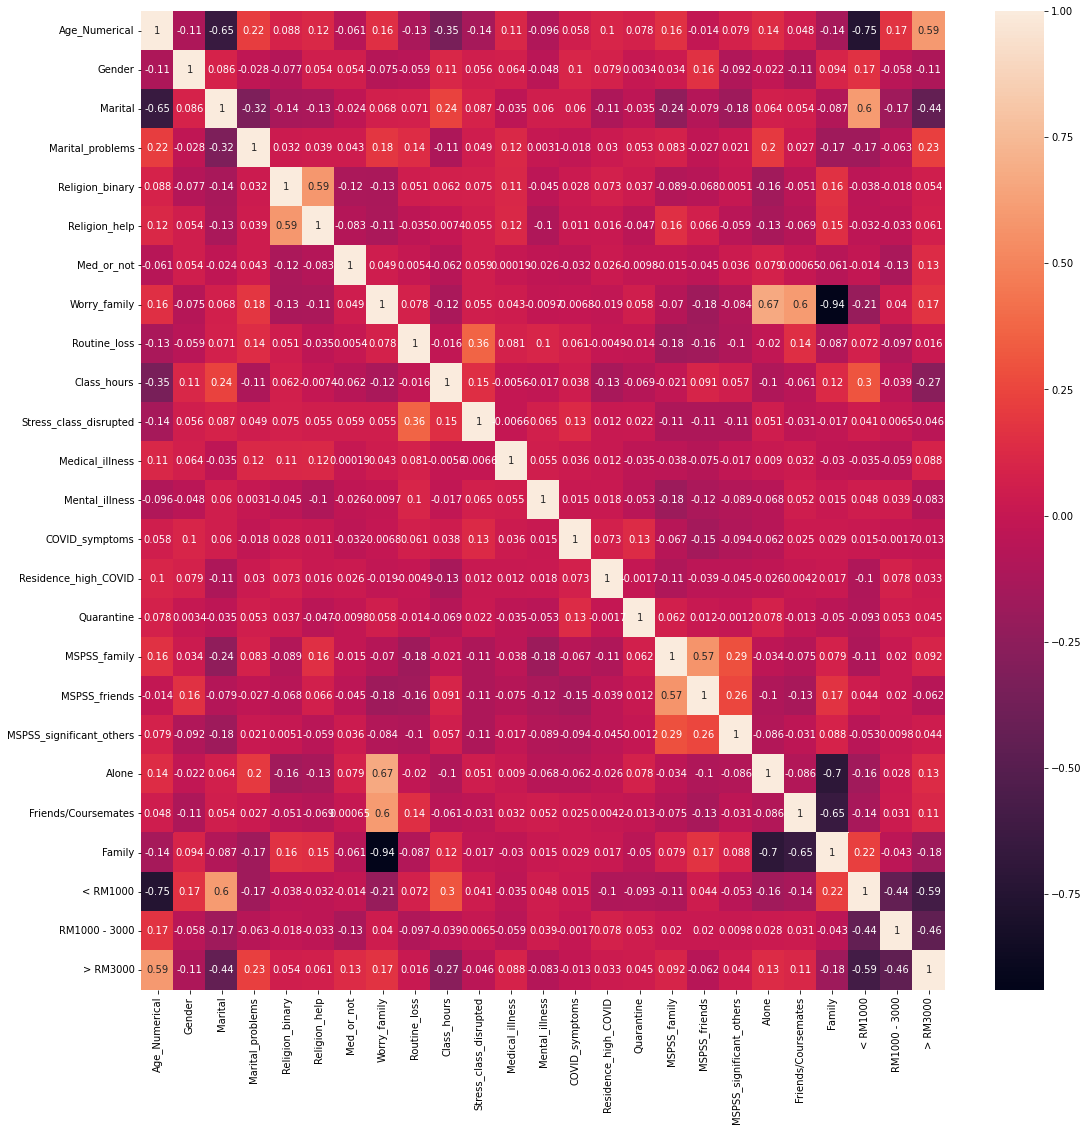

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize = (18, 18))
sns.heatmap(correlation_matrix, annot = True)

### Split the feature into numerical and categorical data

In [8]:
X_numerical = df[['Age_Numerical', 'Class_hours', 'MSPSS_family', 'MSPSS_friends', 'MSPSS_significant_others']]
X_categorical = df[df.columns[~df.columns.isin(X_numerical)]]

### Box plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


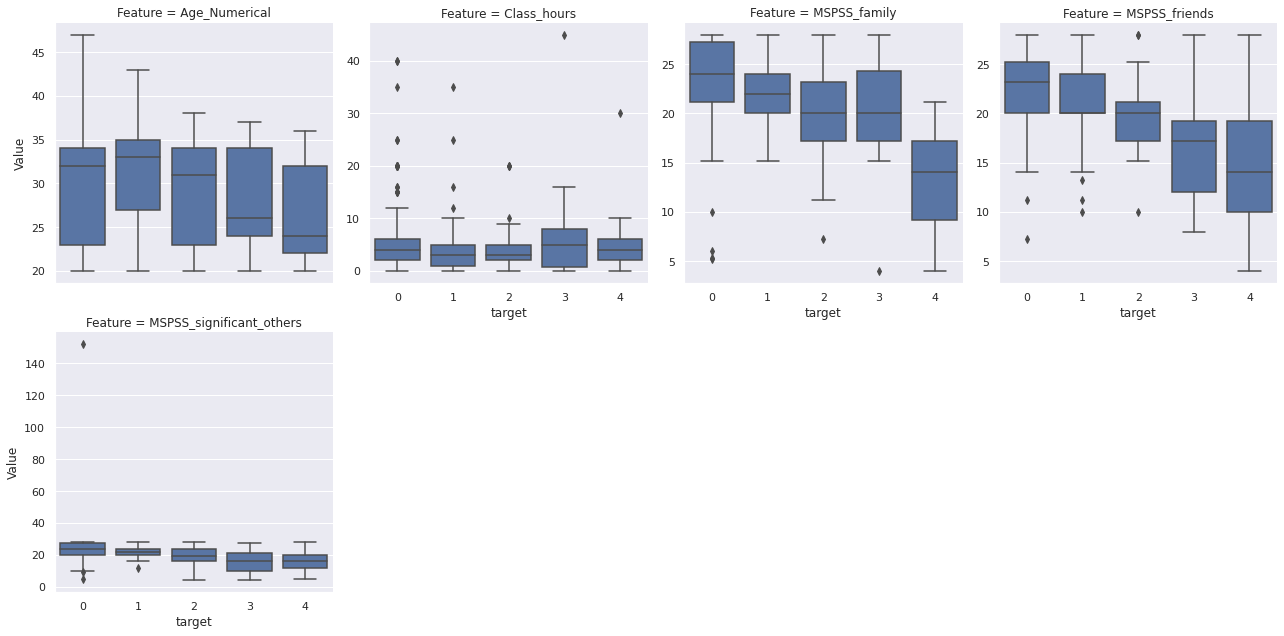

In [9]:
sns.set()
df_plot = pd.DataFrame(X_numerical, copy=True)
df_plot['target'] = y
df_temp = pd.melt(df_plot,id_vars='target',value_vars=list(df_plot.columns)[:-1], 
                  var_name="Feature", value_name="Value")
g = sns.FacetGrid(data = df_temp, col="Feature", col_wrap=4, height=4.5,sharey = False)
g.map(sns.boxplot,"target", "Value");

### Violin plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


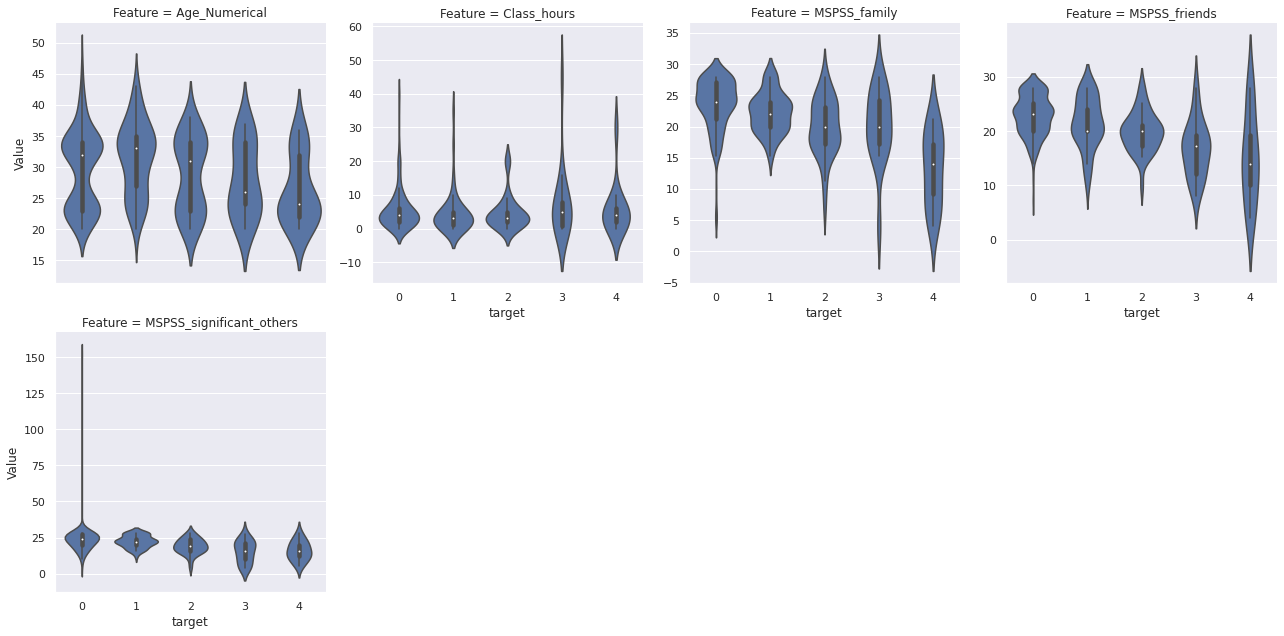

In [10]:
g = sns.FacetGrid(data = df_temp, col="Feature", col_wrap=4, height=4.5,sharey = False)
g.map(sns.violinplot,"target", "Value");

## Feature selection

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

def select_features(X_train, y_train, X_test, score_func):
	fs = SelectKBest(score_func=score_func, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, y_train, fs

def plot_score_mean(X, y, trials, title, score_func):
  plt.figure(figsize = (10, 5))
  dataframe = []
  for t in range(trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, score_func)
    dataframe.append(fs.scores_)
  dataframe = pd.DataFrame(dataframe)
  dataframe_mean = dataframe.mean()
  for i in range(len(dataframe.columns)):
    plt.bar(X.columns[i], dataframe_mean[i])
    print('%s: %f' % (X.columns[i], dataframe_mean[i]))
  plt.xticks(rotation=90)
  plt.title(title)
  plt.show()

### Numerical input


#### ANOVA correlation coefficient

Age_Numerical: 2.108760
Class_hours: 0.995206
MSPSS_family: 15.884337
MSPSS_friends: 13.746091
MSPSS_significant_others: 6.079947


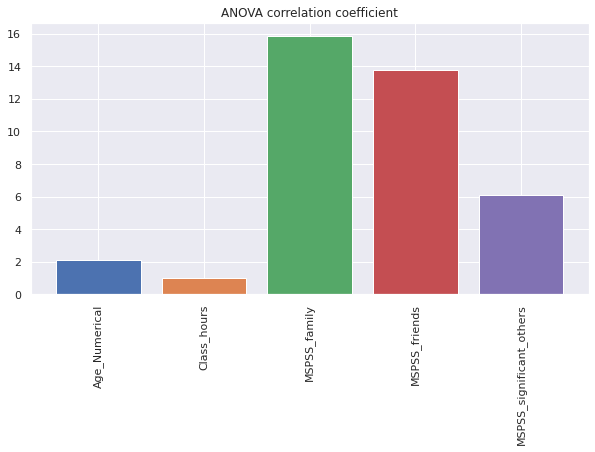

In [12]:
plot_score_mean(X_numerical, y, 500, 'ANOVA correlation coefficient', f_classif)

#### Kendall’s rank coefficient

Age_Numerical: -0.018570
Class_hours: -0.053764
MSPSS_family: -0.315528
MSPSS_friends: -0.290081
MSPSS_significant_others: -0.272723


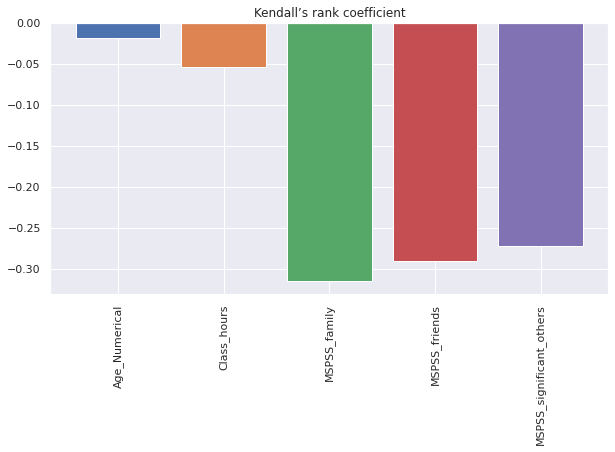

In [13]:
from scipy.stats import kendalltau

def plot_kendalltau_mean(X, y, trials):
  sns.set()
  plt.figure(figsize = (10, 5))
  dataframe = []
  for t in range(trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    features = []
    for i in range(len(X_train.columns)):
      corr, _ = kendalltau(X.iloc[:,i], y)
      features.append(corr)
    dataframe.append(features)
  dataframe = pd.DataFrame(dataframe)
  dataframe_mean = dataframe.mean()
  for i in range(len(dataframe.columns)):
    plt.bar(X.columns[i], dataframe_mean[i])
    print('%s: %f' % (X.columns[i], dataframe_mean[i]))
  plt.xticks(rotation=90)
  plt.title('Kendall’s rank coefficient')
  plt.show()
  
plot_kendalltau_mean(X_numerical, y, 500)

### Categorical data

#### Chi-Squared test

Gender: 0.666404
Marital: 2.320774
Marital_problems: 4.600550
Religion_binary: 1.163862
Religion_help: 2.986156
Med_or_not: 1.007688
Worry_family: 5.852387
Routine_loss: 9.902204
Stress_class_disrupted: 3.024398
Medical_illness: 7.682347
Mental_illness: 36.248504
COVID_symptoms: 3.264149
Residence_high_COVID: 1.402991
Quarantine: 5.280207
Alone: 4.049597
Friends/Coursemates: 4.166353
Family: 1.096007
< RM1000: 5.625261
RM1000 - 3000: 2.323841
> RM3000: 3.676069


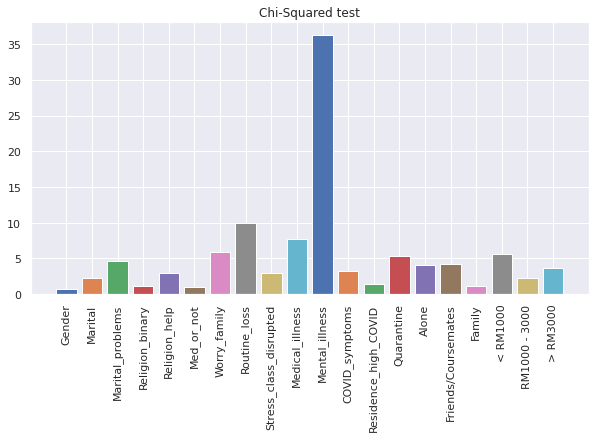

In [14]:
plot_score_mean(X_categorical, y, 500, 'Chi-Squared test', chi2)

#### Mutual Information Statistics

Gender: 0.019488
Marital: 0.032990
Marital_problems: 0.014092
Religion_binary: 0.031655
Religion_help: 0.024335
Med_or_not: 0.029464
Worry_family: 0.014438
Routine_loss: 0.053764
Stress_class_disrupted: 0.046598
Medical_illness: 0.018130
Mental_illness: 0.031854
COVID_symptoms: 0.022184
Residence_high_COVID: 0.010672
Quarantine: 0.018500
Alone: 0.013281
Friends/Coursemates: 0.010943
Family: 0.030131
< RM1000: 0.026234
RM1000 - 3000: 0.015916
> RM3000: 0.016385


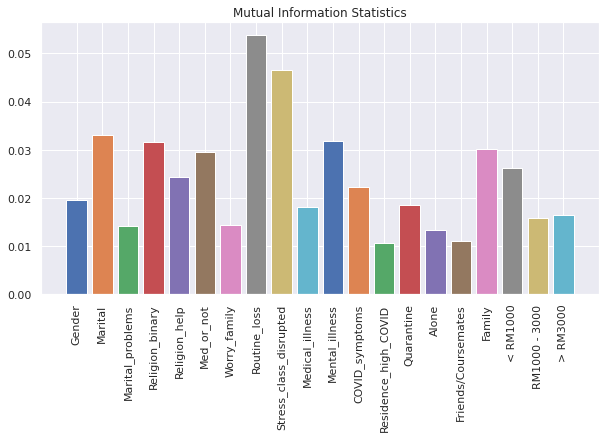

In [15]:
plot_score_mean(X_categorical, y, 500, 'Mutual Information Statistics', mutual_info_classif)